In [1]:
import numpy as np
import pandas as pd
import dask.bag as db
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Users.csv', usecols=[2,3,4,5])
df = df.astype({'CreationDate': 'datetime64',
               'LastAccessDate': 'datetime64'})
df['Location'] = df.Location.astype(str)
df.head()

,CreationDate,LastAccessDate,Location,Reputation
0,2008-07-31 00:00:00.000,2008-08-26 00:16:53.810,on the server farm,1
1,2008-07-31 14:22:31.287,2018-10-29 01:22:39.303,"El Cerrito, CA",45009
2,2008-07-31 14:22:31.287,2018-11-30 22:29:47.533,"Corvallis, OR",3509
3,2008-07-31 14:22:31.287,2018-11-30 18:40:21.677,"Raleigh, NC, United States",13503
4,2008-07-31 14:22:31.317,2018-12-01 15:33:40.507,"New York, NY",28953


In [3]:
df = df[df['Location'].str.contains("Luxembourg")]
df.head()

,CreationDate,LastAccessDate,Location,Reputation
303,2008-08-05 12:27:15.200,2018-11-27 13:07:51.633,Luxembourg,1166
426,2008-08-06 18:24:06.070,2018-11-21 09:54:28.767,"Luxembourg City, Luxembourg",3202
761,2008-08-11 13:24:18.647,2018-12-01 17:20:57.203,"Luxembourg City, Luxembourg",3604
5843,2008-09-15 20:25:38.010,2018-10-20 14:54:55.923,Luxembourg,16
13872,2008-10-17 21:09:26.013,2018-11-30 16:08:24.517,Luxembourg,134


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 303 to 9732465
Data columns (total 4 columns):
CreationDate      834 non-null datetime64[ns]
LastAccessDate    834 non-null datetime64[ns]
Location          834 non-null object
Reputation        834 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 32.6+ KB


In [5]:
df.describe() 

,Reputation
count,834.000000
mean,436.779376
std,2323.204508
min,1.000000
25%,1.000000
50%,4.500000
75%,85.500000
max,46219.000000


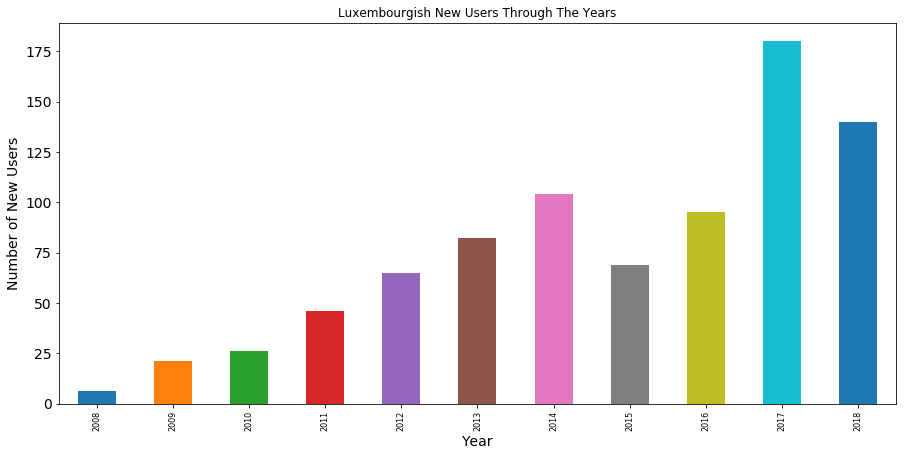

In [6]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] =8
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.titlesize"] = 14

usrCY = df['CreationDate'].groupby(df.CreationDate.dt.to_period("Y")).agg('count')
usrCY.plot.bar().set(xlabel = 'Year', ylabel = 'Number of New Users', title='Luxembourgish New Users Through The Years')
plt.show()

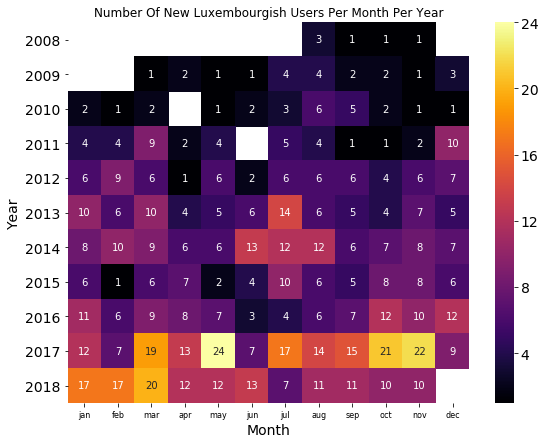

In [7]:
import seaborn as sns
new = df['CreationDate'].groupby([df.CreationDate.dt.year.rename('year'), df.CreationDate.dt.month.rename('month')]).agg('count').reset_index()
new = new.pivot('year', 'month')
plt.rcParams["figure.figsize"] = [9, 7]
plt.rcParams["figure.titlesize"] = 14
hm = sns.heatmap(new, annot=True, cmap='inferno', xticklabels=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
hm.set(xlabel='Month', ylabel='Year', title='Number Of New Luxembourgish Users Per Month Per Year')
plt.show()